 Task 3: Q-learning for mobile robot navigation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
### auxiliary functions

def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def action_encode(act):
    dir_codes = {"N": 0, "E": 1, "S": 2, "W": 3}
    return dir_codes(act)

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
       sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
       print((i+1) * show_step, ' episodes ', label, sequence[-1])
    print('\n')
    plt.figure()
    plt.plot(sequence)
    plt.ylabel(label)
    plt.xlabel('episodes')

In [9]:
class grid_env():
### definition of the maze environment

    def __init__(self, width = 5, height = 5, start = [0, 0], debug = False):
        # Contructor methods create the environment with some given options
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def reset(self):
        # Reset method puts the state at the starting position
        self.pos = self.start[:]   # columns, rows
        return self.pos, 0, False

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return([c, r])

    def state_encode(self, position):
        code = position[0] + position[1] * (self.width) # columns, rows
        return(code)

    def step(self, action):
        # Depending on the action, update the environment state
        if action == "S" and (self.pos[1] < self.height -1):
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and (self.pos[0] < self.width -1):
            self.pos[0] += 1

        done = (self.pos == self.goal)  # check if goal was reached
        if done:
            reward = self.width + self.height  # reward at goal
        else:
            reward = -1  # negative reward at every step

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if self.goal[0] == x and self.goal[1] == y:
                    if self.pos[0] == x and self.pos[1] == y:
                        res += "@"
                    else:
                        res += "o"
                    continue
                if self.pos[0] == x and self.pos[1] == y:
                    res += "x"
                else:
                    res += "_"
            res += "\n"
        return(res)

In [10]:
class agent():
### definition of the agent

    def __init__(self, n_obs, discount = 1, learning_rate = 0.1, eps = {'start': 1, 'min': 0.01, 'decay': 0.001}):
        self.action_space = np.asarray([0, 1, 2, 3])  # north, east, south, west
        n_actions = np.shape(self.action_space)[0]
        self.Q_table = np.zeros((n_obs, n_actions))

        self.epsilon = eps['start']   #initialize the exploration probability to 1
        self.epsilon_decay = eps['decay']   #exploration decreasing decay for exponential decreasing
        self.epsilon_min = eps['min']   # minimum of exploration proba

        self.gamma = discount   #discounted factor
        self.alpha = learning_rate   #learning rate

    def action_selection(self, state):
        if np.random.uniform(0,1) < self.epsilon:
            action = self.action_space[np.random.randint(0, 3)]   # choose a random action with probability epsilon
        else:
            action = np.argmax(self.Q_table[state,:])  # choose the best action for that state with prob 1-epsilon
        return(action)

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha*(reward + self.gamma*max(self.Q_table[next_state,:]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay*e))

    def test_agent(self, env):
        state, _, done = env.reset()
        steps = 0
        while not done and steps < 100:
            action = ag.action_selection(env.state_encode(state))
            next_state, reward, done = env.step(action_decode(action))
            steps += 1
        print(steps)

    def train(self, env, n_episodes = 1000, max_steps = 100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):   # iterate over episodes
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                action = ag.action_selection(env.state_encode(state))  # step 1: choose an action
                old_state = state[:]
                next_state, reward, done = env.step(action_decode(action))    # steps 2 and 3: The environment runs the chosen action and returns next state and reward
                ag.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))  # step 4: policy update
                trial_reward += reward
                t += 1
            ag.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return(all_rewards, all_steps)

Task 3

A.	Modify the maze, changing size and shape, and different start positions. How many steps does it take to reach the target? Does the performance vary as you expect?

B.	Change the agent learning parameters (e.g. learning rate, discount factor, exploration values). How does performance change in terms of learning speed and ability to reach the target? What happens if exploration is always maximum? And if it decreases very quickly?

C. Optional. Change the reward applied to different types of actions and test the learning performance. Are you able to find values for which learning is even faster? Imagine that there was a hole in the maze: how can you make the agent learn to avoid it?

250  episodes  reward  -54.408
500  episodes  reward  -23.804
750  episodes  reward  -11.176
1000  episodes  reward  -5.94
1250  episodes  reward  -3.096
1500  episodes  reward  -1.012
1750  episodes  reward  0.064
2000  episodes  reward  0.828
2250  episodes  reward  1.44
2500  episodes  reward  1.764
2750  episodes  reward  2.088
3000  episodes  reward  2.304
3250  episodes  reward  2.392
3500  episodes  reward  2.612
3750  episodes  reward  2.676
4000  episodes  reward  2.74
4250  episodes  reward  2.804
4500  episodes  reward  2.856
4750  episodes  reward  2.832
5000  episodes  reward  2.868


250  episodes  steps  69.948
500  episodes  steps  44.216
750  episodes  steps  32.008
1000  episodes  steps  26.94
1250  episodes  steps  24.096
1500  episodes  steps  22.012
1750  episodes  steps  20.936
2000  episodes  steps  20.172
2250  episodes  steps  19.56
2500  episodes  steps  19.236
2750  episodes  steps  18.912
3000  episodes  steps  18.696
3250  episodes  steps  18.608
3500  epis

('Number of steps', None)

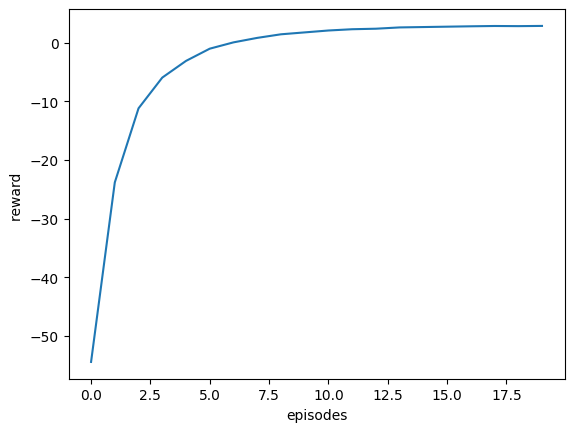

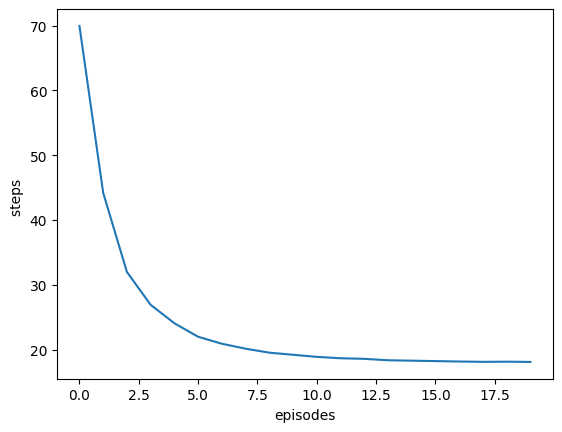

In [17]:
# this code is only an example, remove it or change it

maze_height = 10
maze_width = 10
start = [0, 0]
maze = grid_env(maze_height, maze_width, start)

epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001} # parameter epsilon needs to be a dictionary
ag = agent(maze.n_states, eps = epsilon) # only one parameter is compulsory, try adding different values of discount factor and learing rate
episodes = 5000
steps = 100
[rewards, steps] = ag.train(maze, episodes, steps)

display_learning(rewards, "reward ")
display_learning(steps, "steps ")

print(ag.Q_table)



maze = grid_env(maze_height, maze_width, start, debug = True)
"Number of steps", ag.test_agent(maze)


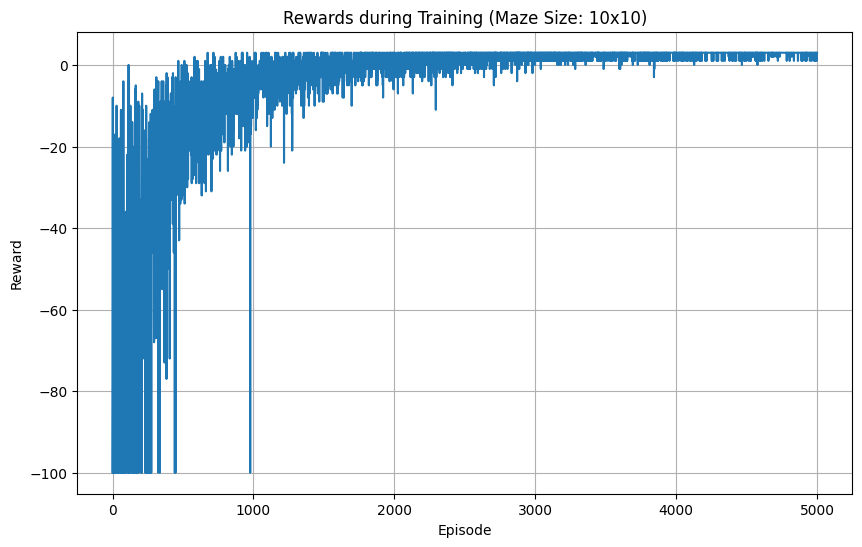

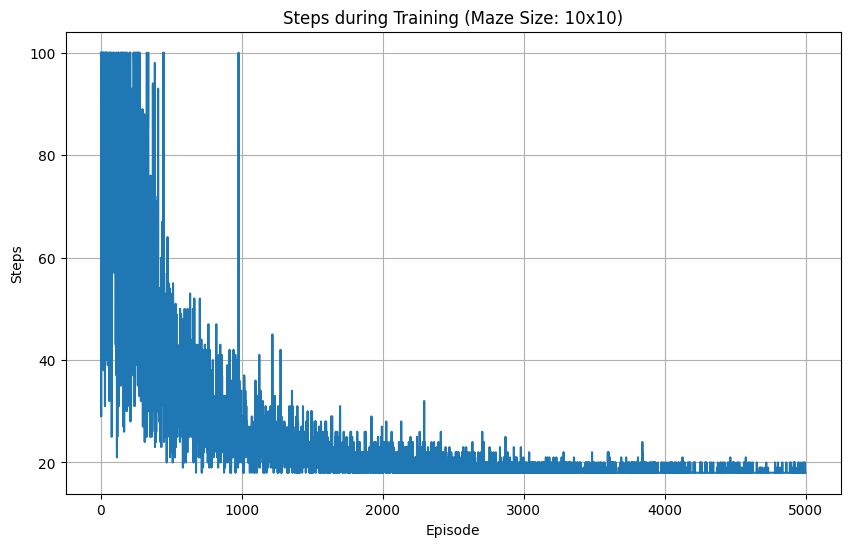

_x________
__________
__________
__________
__________
__________
__________
__________
__________
_________o

__________
_x________
__________
__________
__________
__________
__________
__________
__________
_________o

__________
__x_______
__________
__________
__________
__________
__________
__________
__________
_________o

__________
___x______
__________
__________
__________
__________
__________
__________
__________
_________o

__________
____x_____
__________
__________
__________
__________
__________
__________
__________
_________o

__________
_____x____
__________
__________
__________
__________
__________
__________
__________
_________o

__________
______x___
__________
__________
__________
__________
__________
__________
__________
_________o

__________
_______x__
__________
__________
__________
__________
__________
__________
__________
_________o

__________
________x_
__________
__________
__________
__________
__________
__________
__________
_________o

_

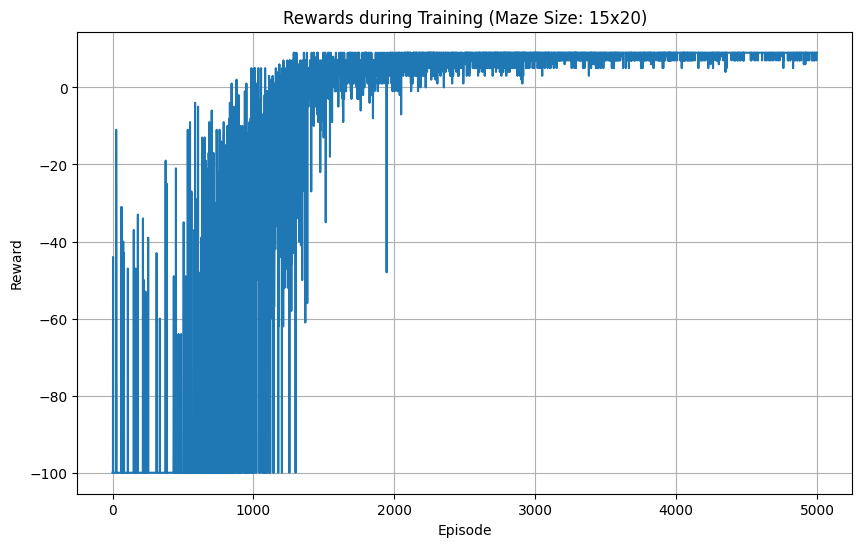

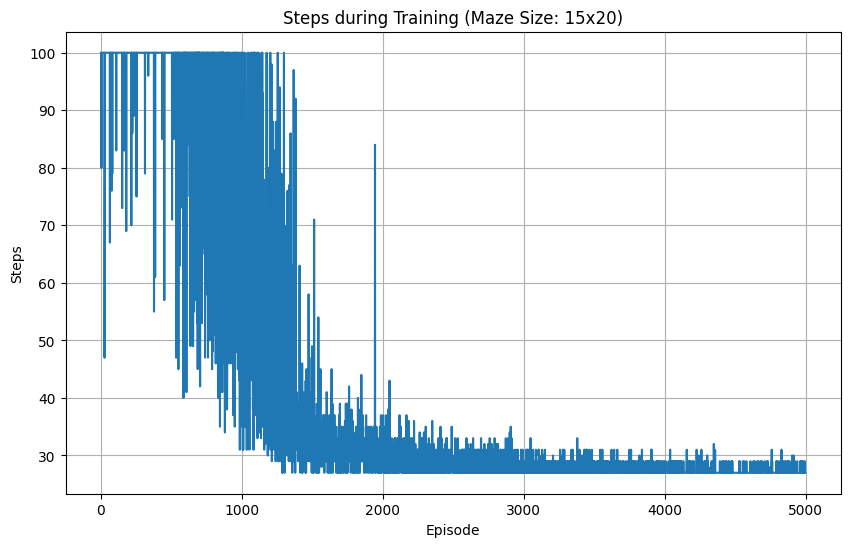

_______________
_______________
_______________
_______________
_______________
__x____________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
______________o

_______________
_______________
_______________
_______________
_______________
_______________
__x____________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
______________o

_______________
_______________
_______________
_______________
_______________
_______________
_______________
__x____________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
______________o

_______________
_______________
_____

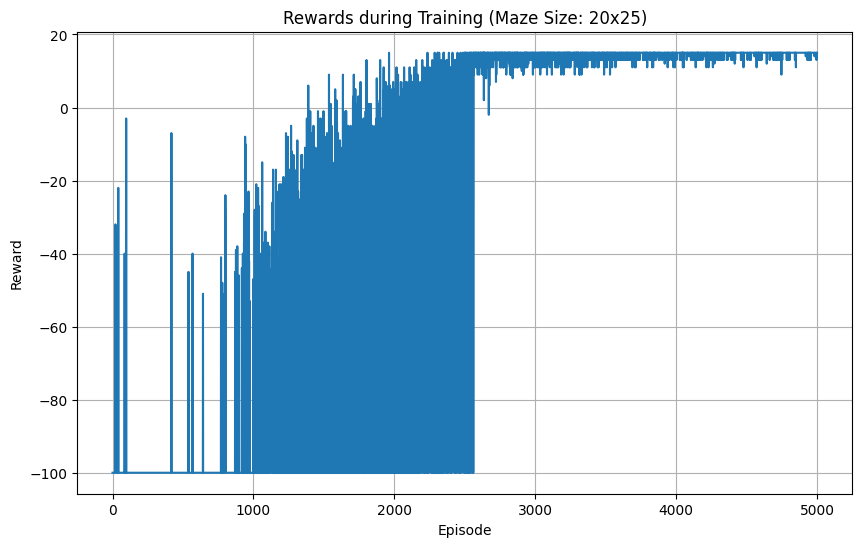

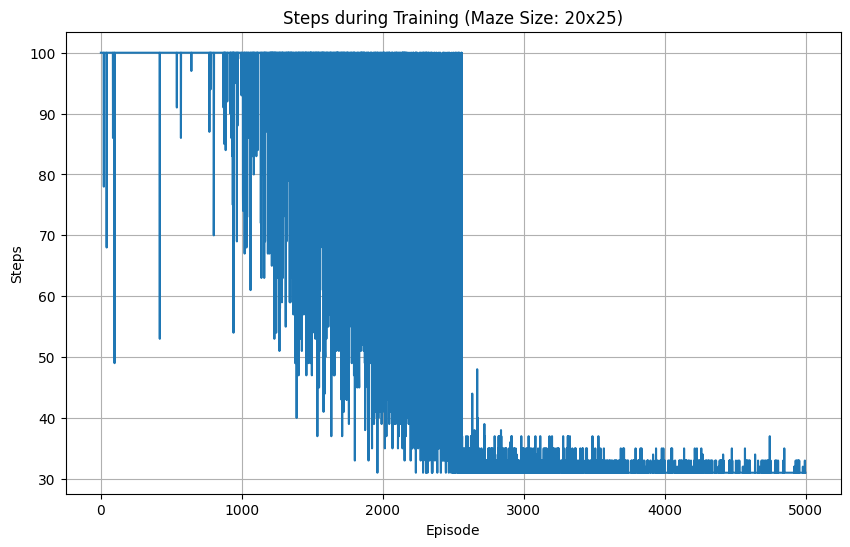

____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____x_______________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
___________________o

____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____x_______________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________

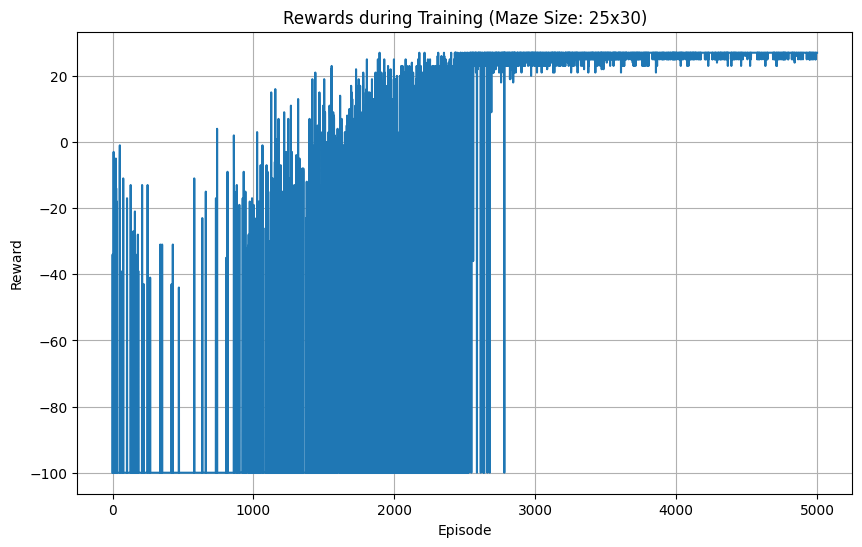

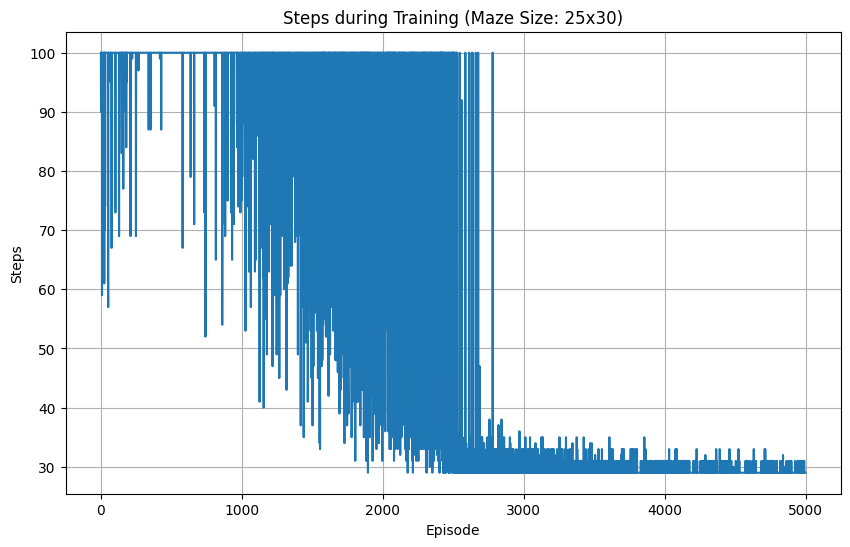

_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________x_______________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
________________________o

_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
___________

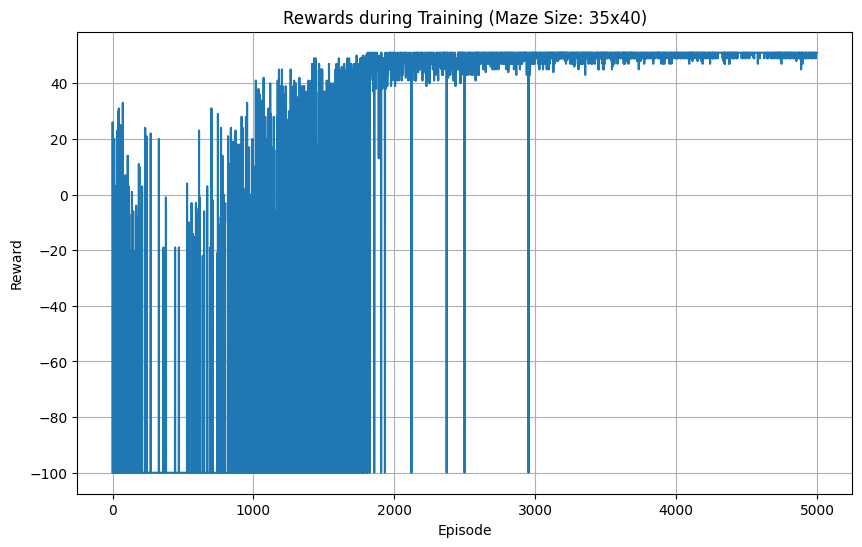

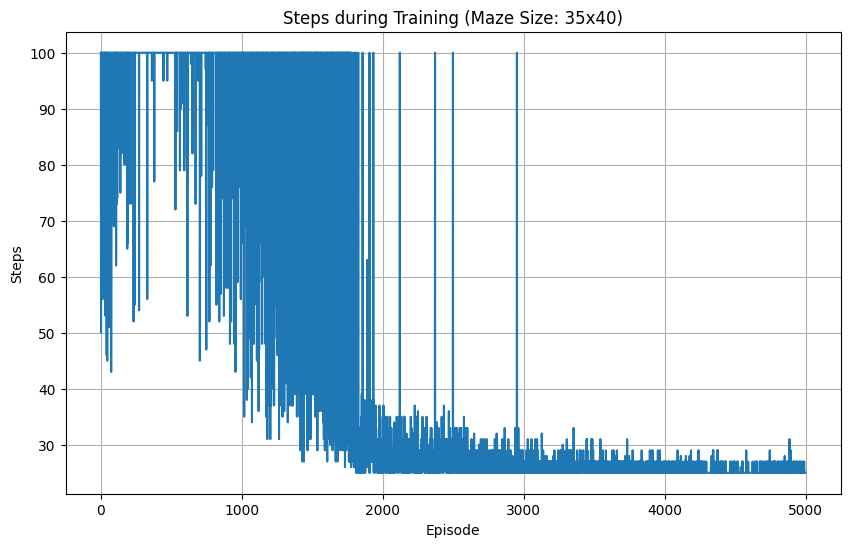

___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
____________________________

In [18]:

import matplotlib.pyplot as plt

# Define maze parameters
maze_params = [[10, 10], [15, 20], [20, 25], [25, 30], [35, 40]]  # Update maze sizes
start_points = [[0, 0], [2, 4], [4, 8], [8, 16], [16, 32]]  # Update start positions


# Loop through maze parameters
for i in range(len(maze_params)):
    # Create maze environment
    maze_height, maze_width = maze_params[i]
    start = start_points[i]
    maze = grid_env(maze_height, maze_width, start)

    # Create agent

    epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001}  # Update epsilon values as needed
    ag = agent(maze.n_states, eps=epsilon)  # Update other agent parameters as needed

    # Train agent
    episodes = 5000
    steps = 100
    rewards, steps = ag.train(maze, episodes, steps)

    # Plot rewards and steps
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Rewards during Training (Maze Size: {}x{})'.format(maze_height, maze_width))
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps during Training (Maze Size: {}x{})'.format(maze_height, maze_width))
    plt.grid(True)
    plt.show()

    # Test agent
    maze = grid_env(maze_height, maze_width, start, debug=True)
    ag.test_agent(maze)
    "Number of steps", ag.test_agent(maze)


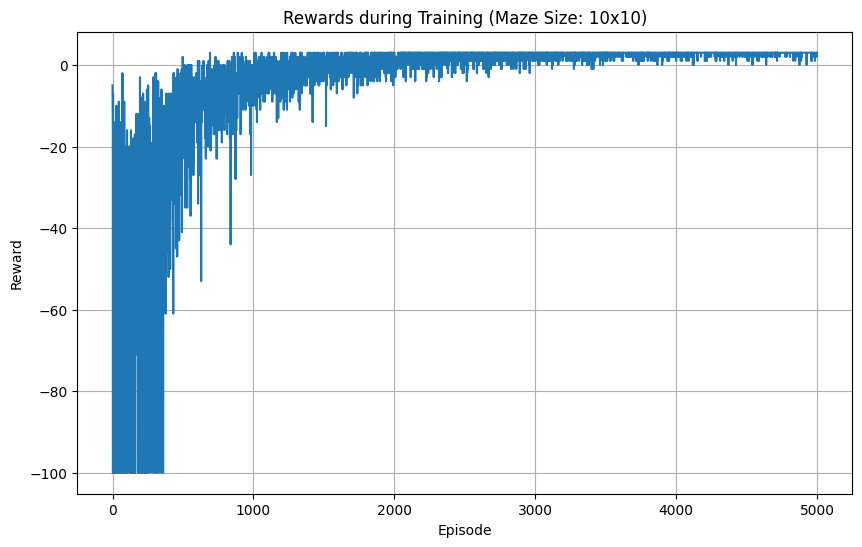

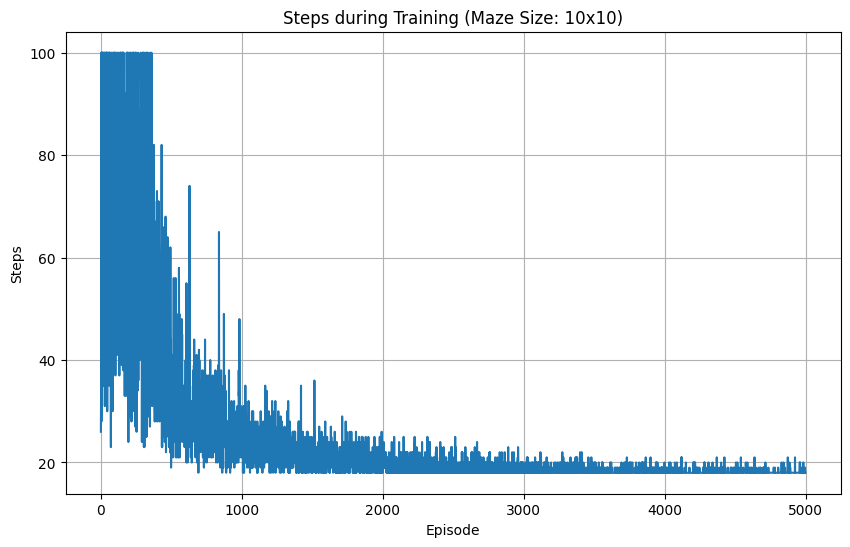

_x________
__________
__________
__________
__________
__________
__________
__________
__________
_________o

__x_______
__________
__________
__________
__________
__________
__________
__________
__________
_________o

___x______
__________
__________
__________
__________
__________
__________
__________
__________
_________o

____x_____
__________
__________
__________
__________
__________
__________
__________
__________
_________o

_____x____
__________
__________
__________
__________
__________
__________
__________
__________
_________o

______x___
__________
__________
__________
__________
__________
__________
__________
__________
_________o

_______x__
__________
__________
__________
__________
__________
__________
__________
__________
_________o

________x_
__________
__________
__________
__________
__________
__________
__________
__________
_________o

_________x
__________
__________
__________
__________
__________
__________
__________
__________
_________o

_

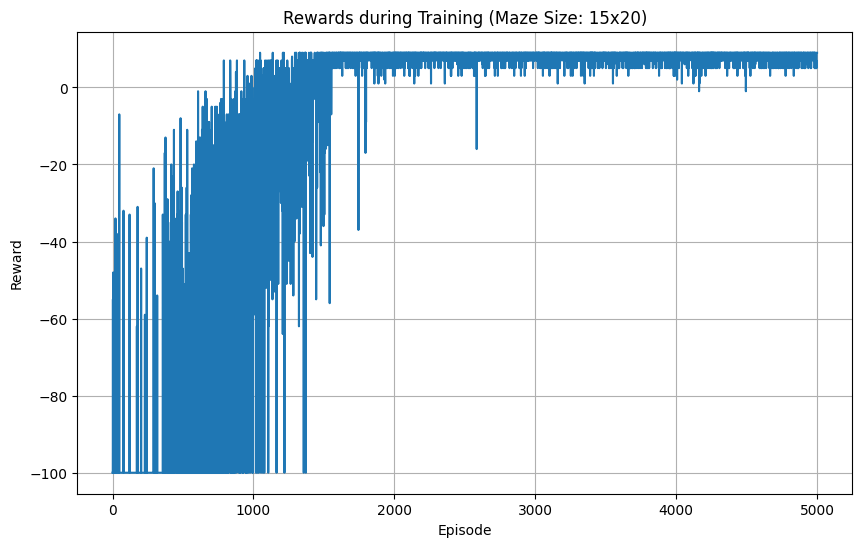

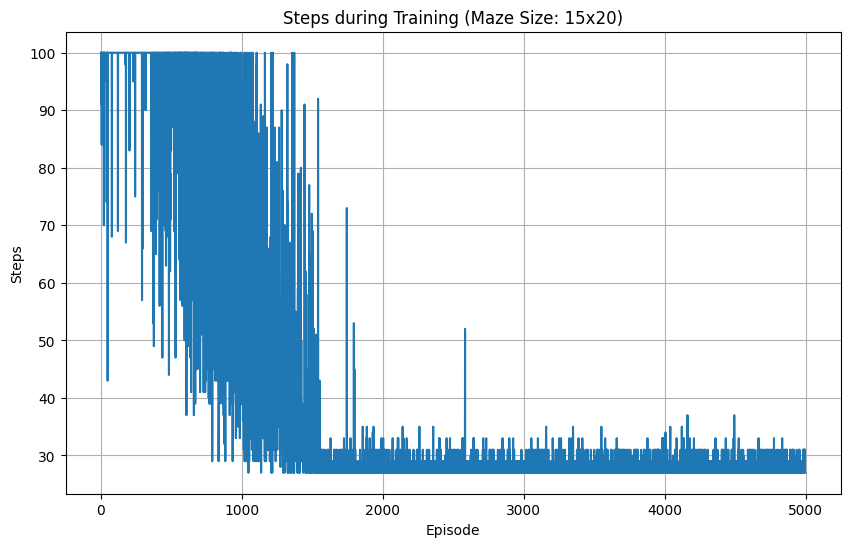

_______________
_______________
_______________
_______________
_______________
__x____________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
______________o

_______________
_______________
_______________
_______________
_______________
_______________
__x____________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
______________o

_______________
_______________
_______________
_______________
_______________
_______________
_______________
__x____________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
_______________
______________o

_______________
_______________
_____

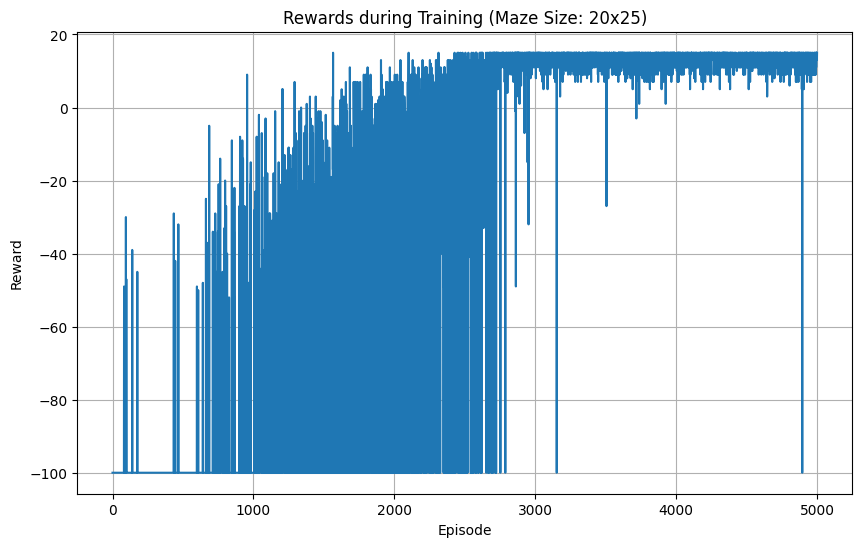

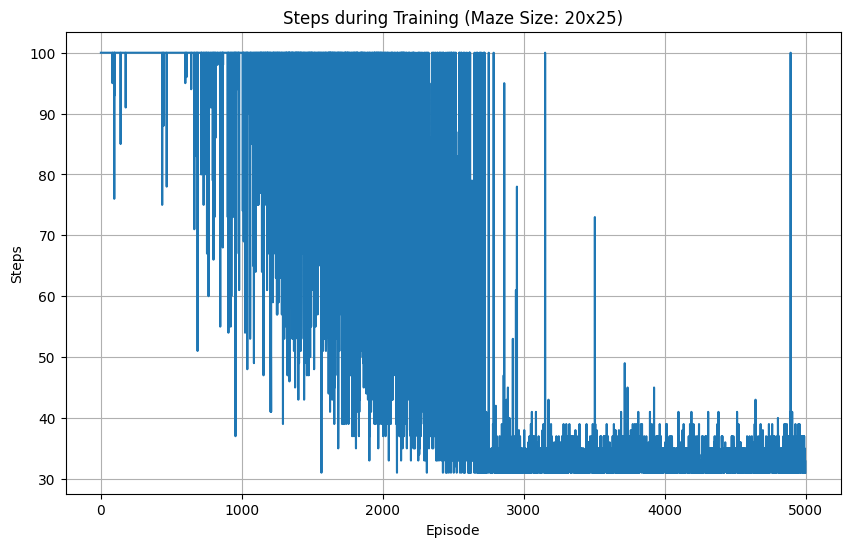

____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____x_______________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
___________________o

____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____x_______________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________________
____________

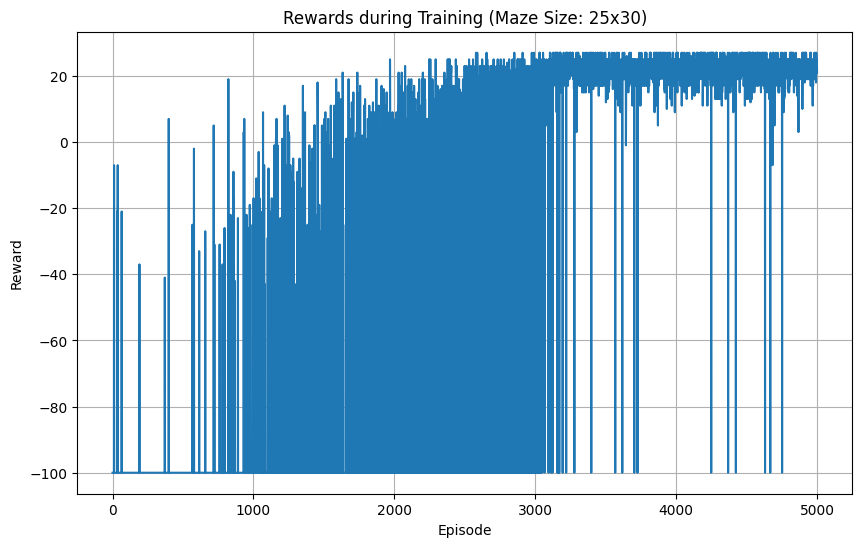

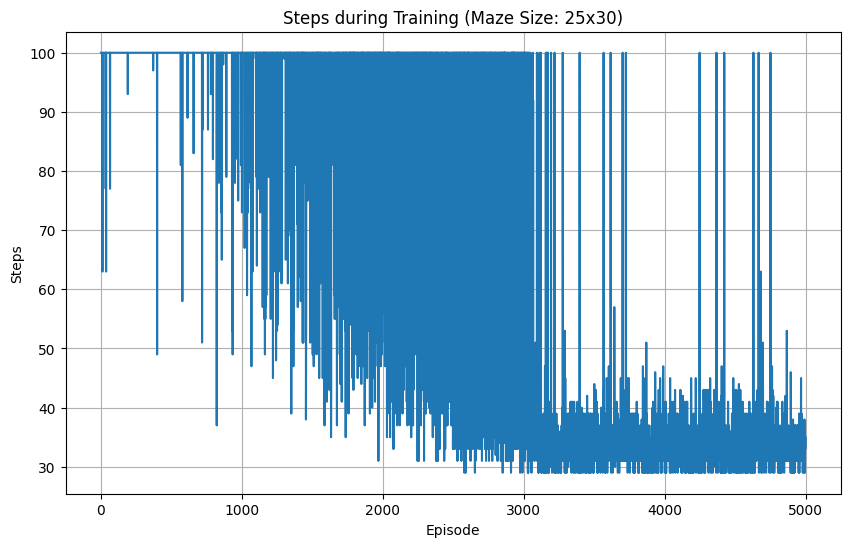

_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________x_______________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
________________________o

_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
_________________________
___________

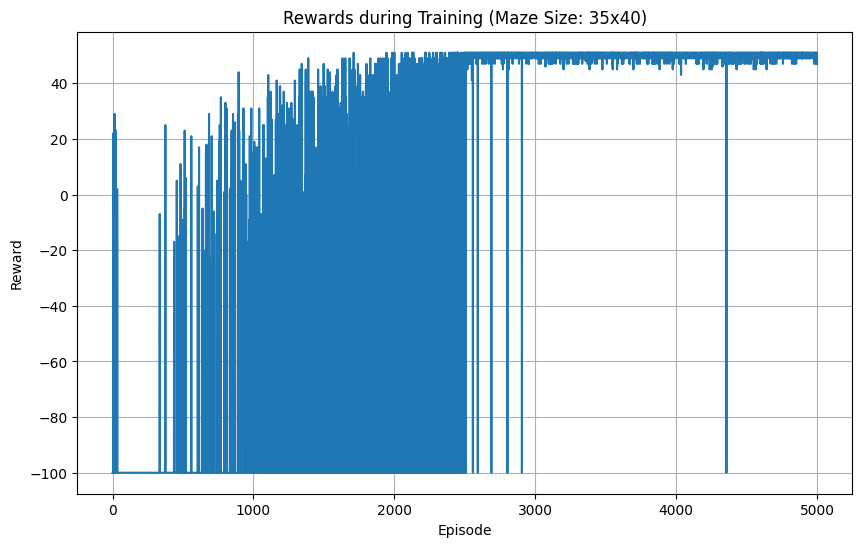

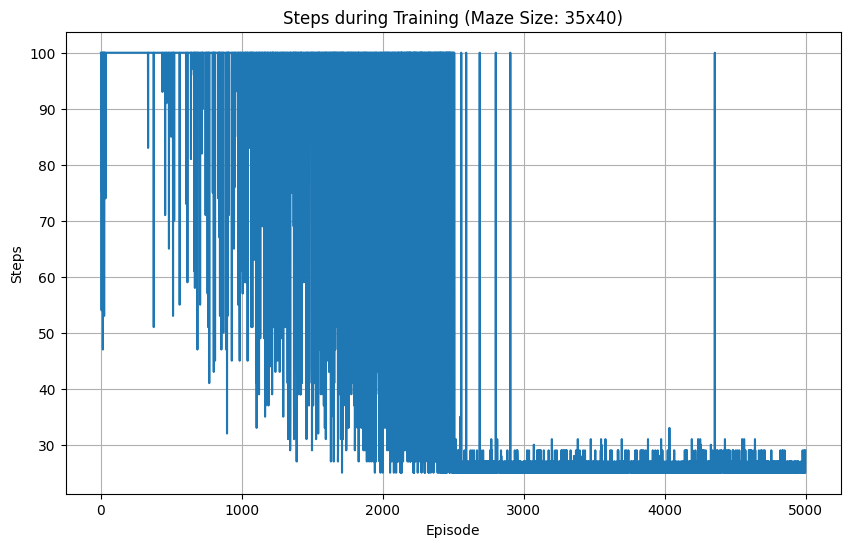

___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
___________________________________
____________________________

In [14]:
import matplotlib.pyplot as plt

# Define maze parameters
maze_params = [[10, 10], [15, 20], [20, 25], [25, 30], [35, 40]]  # Update maze sizes
start_points = [[0, 0], [2, 4], [4, 8], [8, 16], [16, 32]]  # Update start positions

# Define epsilon values
epsilon_values = [
    {'start': 1, 'min': 0.01, 'decay': 0.001},
    {'start': 0.8, 'min': 0.05, 'decay': 0.002},
    {'start': 0.5, 'min': 0.1, 'decay': 0.003},
    {'start': 0.3, 'min': 0.2, 'decay': 0.004},
     {'start': 0.2, 'min': 0.04, 'decay': 0.005}
]

# Loop through maze parameters
for i in range(len(maze_params)):
    # Create maze environment
    maze_height, maze_width = maze_params[i]
    start = start_points[i]
    maze = grid_env(maze_height, maze_width, start)

    # Create agent
    epsilon = epsilon_values[i]
    #epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001}  # Update epsilon values as needed
    learning_rate = 0.1  # Update learning rate as needed
    discount_factor = 0.9  # Update discount factor as needed
    ag = agent(maze.n_states, eps=epsilon, learning_rate=learning_rate, discount=discount_factor)  # Update agent parameters as needed

    # Train agent
    episodes = 5000
    steps = 100
    rewards, steps = ag.train(maze, episodes, steps)

    # Plot rewards and steps
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Rewards during Training (Maze Size: {}x{})'.format(maze_height, maze_width))
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps during Training (Maze Size: {}x{})'.format(maze_height, maze_width))
    plt.grid(True)
    plt.show()

    # Test agent
    maze = grid_env(maze_height, maze_width, start, debug=True)
    ag.test_agent(maze)
